<a href="https://colab.research.google.com/github/PriscillaMuli/Priscilla_Muli_IP_Week_13_Moringa_Data_Science_Core/blob/main/Priscilla_Muli_IP_Week_13_R_Kira_Plastinina_Customer_Analysis__UNSML_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction
* This is an Unsupervised Machine Learning Project to understand the customer characteristics of Kira Plastinina.

## 1.1.1 Problem Definition

* Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. 
* The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year.
* More specifically, they would like to learn the characteristics of customer groups.

## 1.1.2  Steps Taken

1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution
7. Challenge the Solution
8. Follow up Questions



## 1.1.3 Data Sourcing
* The dataset for this project can be found here: [link text](http://bit.ly/EcommerceCustomersDataset) 
* The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
* The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


# 1.2 Loading the Libraries we need for the analysis

In [ ]:
# Installing packages that we have not.

library(devtools)
install_github("vqv/ggbiplot", force = TRUE)
install.packages("DataExplorer") 
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")
install.packages("corrplot")
install.packages("factoextra")
install.packages("Rtsne")
install.packages("caret")


Loading required package: usethis



✔  checking for file ‘/tmp/RtmpXNdGcI/remotes37357f36f8c4/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [ ]:
# Loading Libraries necessary

library(tidyverse)
library(magrittr)
library(warn = -1)

library(ggbiplot)
library(RColorBrewer)
library(ggplot2)
library(lattice)
library(corrplot)

library(DataExplorer)
library(Hmisc)
library(pastecs)
library(psych)
library(factoextra)
library(Rtsne)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dp

# 1.3 Loading Data

In [ ]:
# Loading the Dataset 

df = read_csv('http://bit.ly/EcommerceCustomersDataset')

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)


# 1.4 Exploratory Data Analysis

In [ ]:
# Checking the top observations

head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
# Checking the bottom observations

tail(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [ ]:
# Checking the data a subset and summary data

glimpse(df)

Observations: 12,330
Variables: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

* The dataset has 18 columns and 12,330 rows.
* There are various data types: double, character and logical.

* Some need to be encoded.

In [ ]:
# Checking the summary statistics of the dataset in all the columns

summary(df)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# 1.5 Data Cleaning

## 1.5.1 Missing Values

In [ ]:
# Checking for Missing Values

colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

* There are missing values in some columns.
* We will fill them appropriately.

In [ ]:
# Filling the missing values using the mutate function and pipe operator
# Each column will be filled with its own mean

df  = df %>%

    mutate(Administrative =replace(Administrative,is.na(Administrative),mean(Administrative,na.rm=TRUE)))%>%
    mutate(Administrative_Duration =replace(Administrative_Duration,is.na(Administrative_Duration),mean(Administrative_Duration,na.rm=TRUE)))%>%
    mutate(Informational = replace(Informational, is.na(Informational), mean(Informational, na.rm = TRUE)))%>%
    mutate(Informational_Duration =replace(Informational_Duration,is.na(Informational_Duration),mean(Informational_Duration,na.rm=TRUE)))%>%
    mutate(ProductRelated =replace(ProductRelated,is.na(ProductRelated),mean(ProductRelated,na.rm=TRUE)))%>%
    mutate(ProductRelated_Duration = replace(ProductRelated_Duration, is.na(ProductRelated_Duration), mean(ProductRelated_Duration, na.rm = TRUE)))%>%
    mutate(BounceRates =replace(BounceRates, is.na(BounceRates),mean(BounceRates,na.rm=TRUE)))%>%
    mutate(ExitRates = replace(ExitRates, is.na(ExitRates), mean(ExitRates, na.rm = TRUE)))

   

In [ ]:
# Confirming that we have no null values

sum(colSums(is.na(df)))

[1] 0

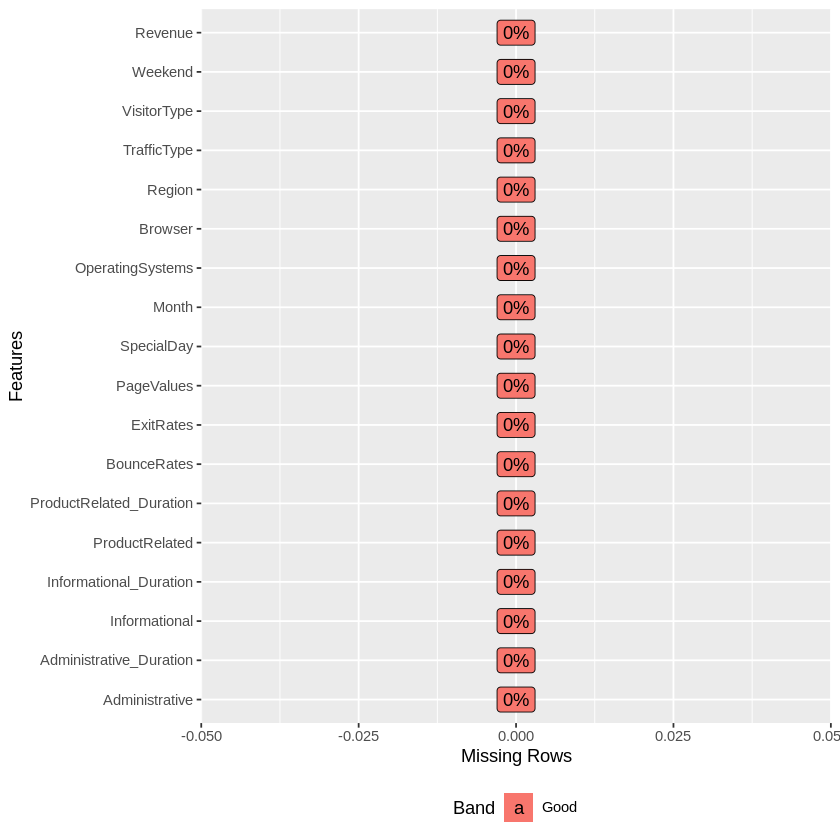

In [ ]:
# checking if we have any remaining missing values
plot_missing(df)

* The output is 0: we have no null values

## 1.5.2 Duplicates 

In [ ]:
# Checking for Duplicates

df3 <- df[duplicated(df),]
dim(df3)

[1] 119  18

* There are 119 dupicated rows.
* We will remove them.

In [ ]:
# Removing duplicates

df <- df[!duplicated(df),]
dim(df)

[1] 12211    18

### Boxplots

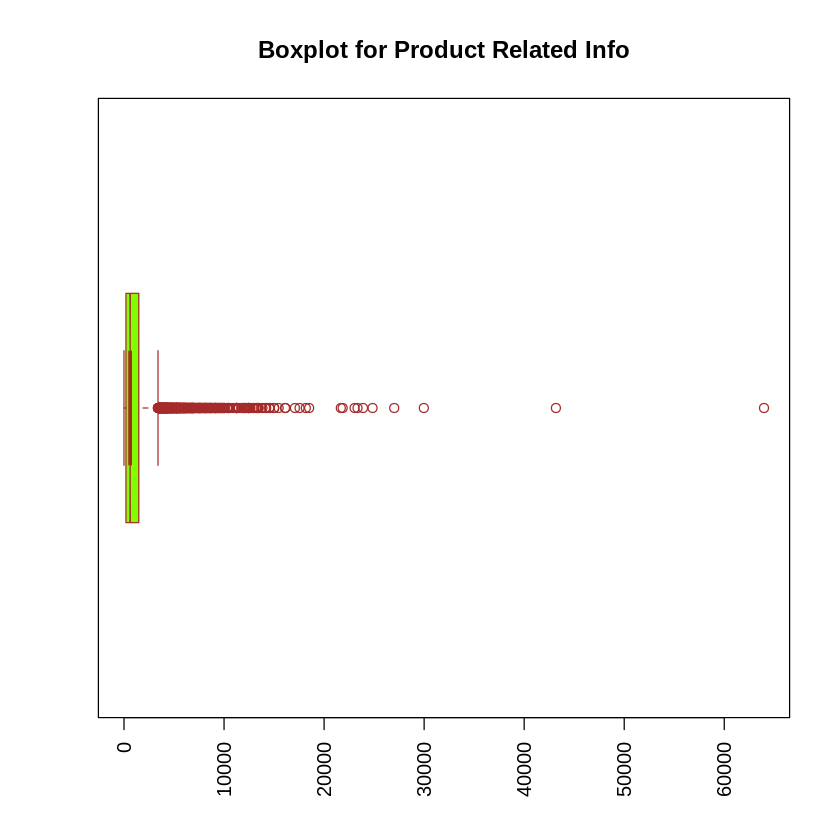

In [ ]:
# Plotting a boxplot
# labeling the title
# labeling the x axis
# specifying color options

boxplot(df$ProductRelated_Duration,
main = "Boxplot for Product Related Info",
at = c(1),
names = c("Produc Related Info"),
las = 2,
col = c("chartreuse"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

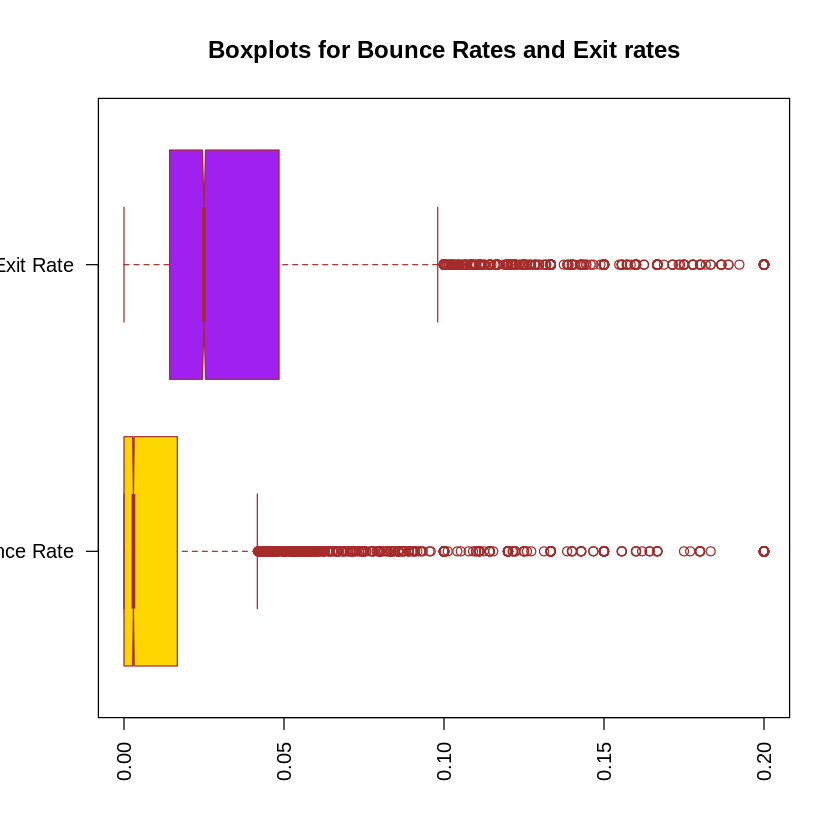

In [ ]:
# Plotting a boxplot
# labeling the title
# labeling the x axis
# specifying color options
boxplot(df$BounceRates, df$ExitRates,
main = "Boxplots for Bounce Rates and Exit rates",
at = c(1,2),
names = c("Bounce Rate", "Exit Rate"),
las = 2,
col = c("gold","purple"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

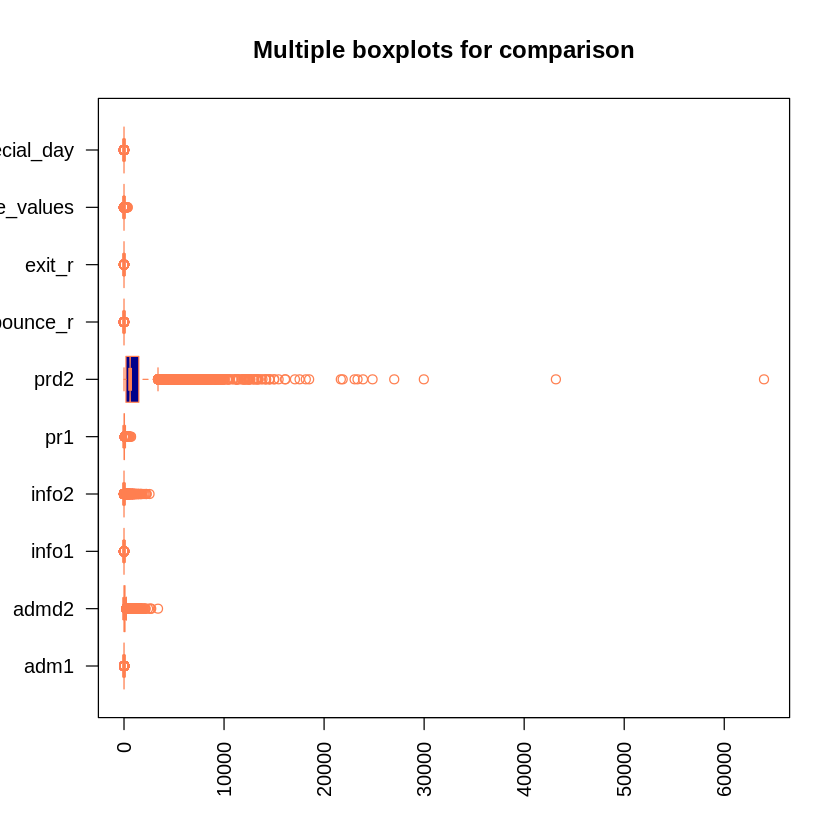

In [ ]:
# Using a boxplot to check for observations far away from other data points.
# Using all double type columns: specifying each
# labeling the title
# labeling the x axis
# specifying color options

adm1 <- df$Administrative
admd2 <-df$Administrative_Duration
info1 <- df$Informational
info2 <- df$Informational_Duration
pr1 <- df$ProductRelated    
prd2 <- df$ProductRelated_Duration
bounce_r <-df$BounceRates
exit_r <- df$ExitRates
page_values <-df$PageValues
special_day <- df$SpecialDay

 

boxplot(adm1, admd2, info1, info2, pr1, prd2, bounce_r, exit_r, page_values, special_day,
main = "Multiple boxplots for comparison",
at = c(1,2,3,4,5,6,7,8,9,10),
names = c("adm1", "admd2", "info1", "info2", "pr1", "prd2", "bounce_r", "exit_r", "page_values", "special_day"),
las = 2,
col = c("orange","red","blue", "grey", "chartreuse", "blue4", "purple", "green", "gold", "azure"),
border = "coral",
horizontal = TRUE,
notch = TRUE
)

* All the columns have a profusion of outliers.
* We will not remove as we want to understand the customers.

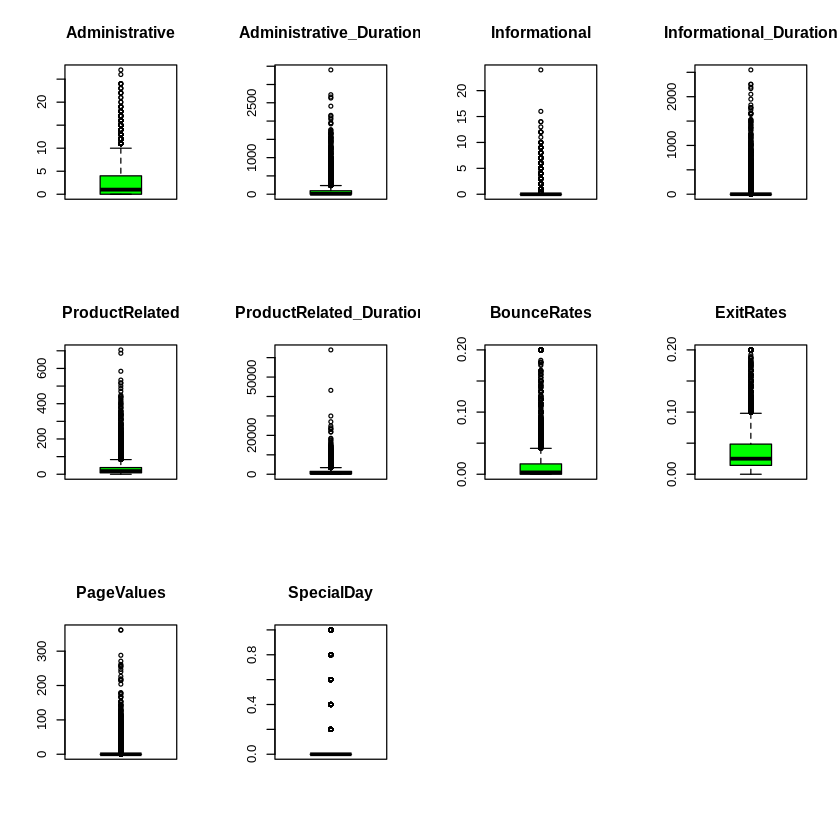

In [ ]:
# Creating separate boxplots for each attribute
par(mfrow=c(3,4))
for(i in 1:10) {
	boxplot(df[,i], main=names(df)[i], col = "green")}

* We have outliers in nearly all the variables represented by rings.
* we will plot the individuals for clearer interpretation
* we will not remove the outliers as they may convey insights about special days or certain customers.

# 1.6 Univariate Analysis
Univariate methods involve analysing one variable at a time.

Univariate analysis includes:

* Measures of central tendancy:
Mean,
Median,
Mode

* Measures of dispersion:
Min,
Max,
Range,
Quartiles,
Variance,
Standard deviation

* Other measures include:
Skewness,
Kurtosis

* Univariate Graphs:
Histogram,
Box plots,
Bar plots,
Kernel density plots

## Measures Central Tendency & Dispersion

In [ ]:
# Computing the summary statistics for a particular column
summary(df$BounceRates)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.002941 0.020448 0.016667 0.200000 

* The output provides the min, quartiles, mean , median max values of the Bounce rates.


In [ ]:
# The method describe() gives more measures of dispersion compared to the summary()
# It outputs the range,variance,skewness, kurtosis and standard error in addition to measures of dispersion
# The describe() function which is part of the Hmisc package displays the following additional statistics:

# Number of rows
# Standard deviation
# Trimmed mean
# Mean absolute deviation
# Skewness
# Kurtosis
# Standard error

describe(df$BounceRates)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,12211,0.02044841,0.04538022,0.002941176,0.008145961,0.004360588,0,0.2,0.2,3.15392,9.26461,0.0004106681


In [ ]:
# We can also calculate the mean of a variable using the code below

mean(df$BounceRates)

[1] 0.02044841

In [ ]:
# The stat.desc() function which is part of the pastecs package displays the following additional statistics:

# Variance
# Coefficient of variation
# Confidence interval for mean

stat.desc(df$BounceRates)

nbr.val     nbr.null       nbr.na          min          max        range 
1.221100e+04 5.510000e+03 0.000000e+00 0.000000e+00 2.000000e-01 2.000000e-01 
         sum       median         mean      SE.mean CI.mean.0.95          var 
2.496956e+02 2.941176e-03 2.044841e-02 4.106681e-04 8.049745e-04 2.059364e-03 
     std.dev     coef.var 
4.538022e-02 2.219254e+00

In [ ]:
# Frequency Tables

table(df$Revenue)


FALSE  TRUE 
10303  1908 

* The Revenue variable is imbalanced.
* Revenue was earned on few cases.

## Visualizations

### Histograms
* Checking the distributions of the data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


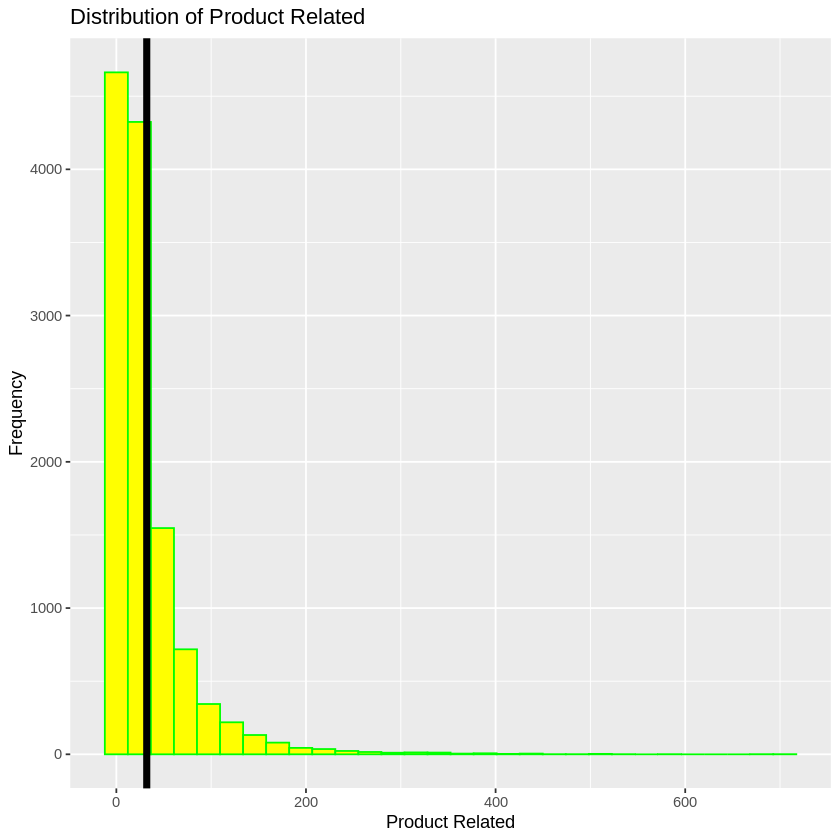

In [ ]:
# Plotting a histogram using ggplots 
# 
#

df %>%
    ggplot(aes(ProductRelated)) +
    geom_histogram(color = "Green",fill = "yellow") +
    geom_vline(xintercept = mean(df$ProductRelated), lwd = 2) +
    labs(title = "Distribution of Product Related",
         x = "Product Related",
         y = "Frequency")

* The variable Product Related is skewed to the right.
* It has a profusion of outliers too as we saw using a boxplot.
* We will not remove them. we shall investigate them for insights

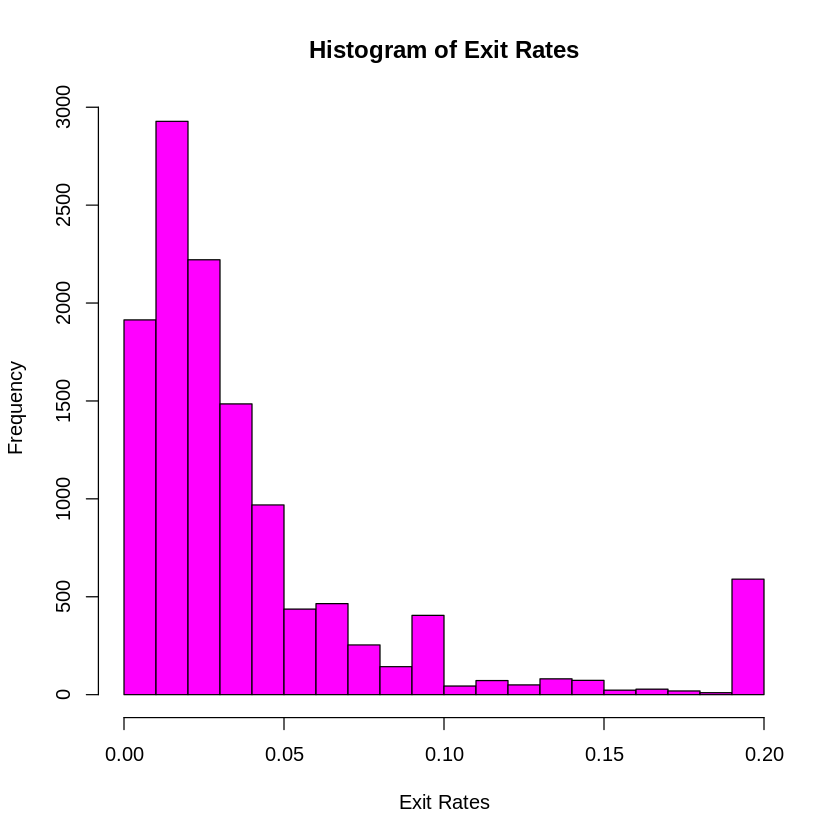

In [ ]:
# plotting a histogram of Exit Rates

hist(df$ExitRates,
     main = "Histogram of Exit Rates",
     xlab = "Exit Rates",
     col = "magenta")

* The distribution of Exit Rates is also right skewed.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


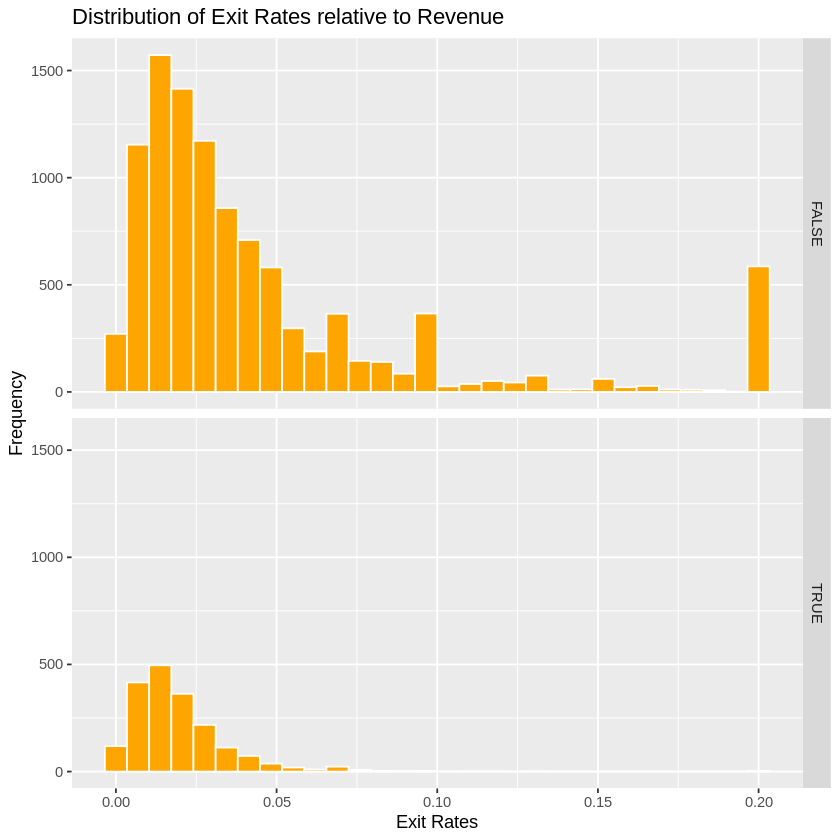

In [ ]:
# Plotting a histogram Exit Rates relaive to Revenue 

df %>%
    ggplot(aes(ExitRates)) +
    geom_histogram(color = "white",fill = "orange") +
    labs(title = "Distribution of Exit Rates relative to Revenue",
         x = "Exit Rates",
         y = "Frequency") +
    facet_grid(Revenue~.)

* The histograms are right skewed with presence of outliers.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


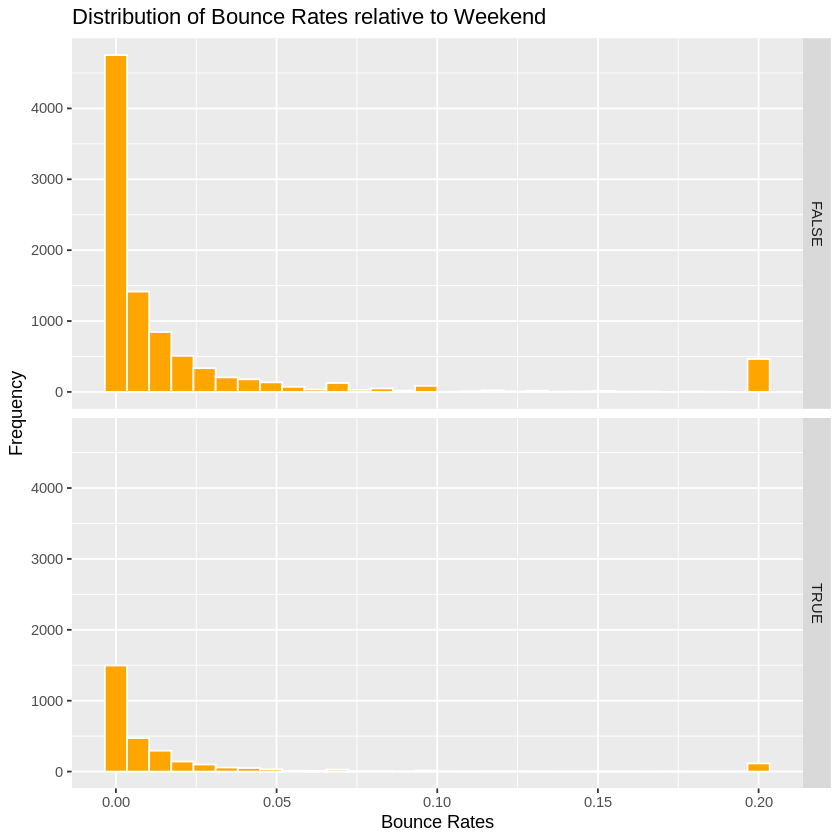

In [ ]:
# Plotting a Histogram of the Bounce rates relaive to Weekend

df %>%
    ggplot(aes(BounceRates)) +
    geom_histogram(color = "white",fill = "orange") +
    labs(title = "Distribution of Bounce Rates relative to Weekend",
         x = "Bounce Rates",
         y = "Frequency") +
    facet_grid(Weekend~.)

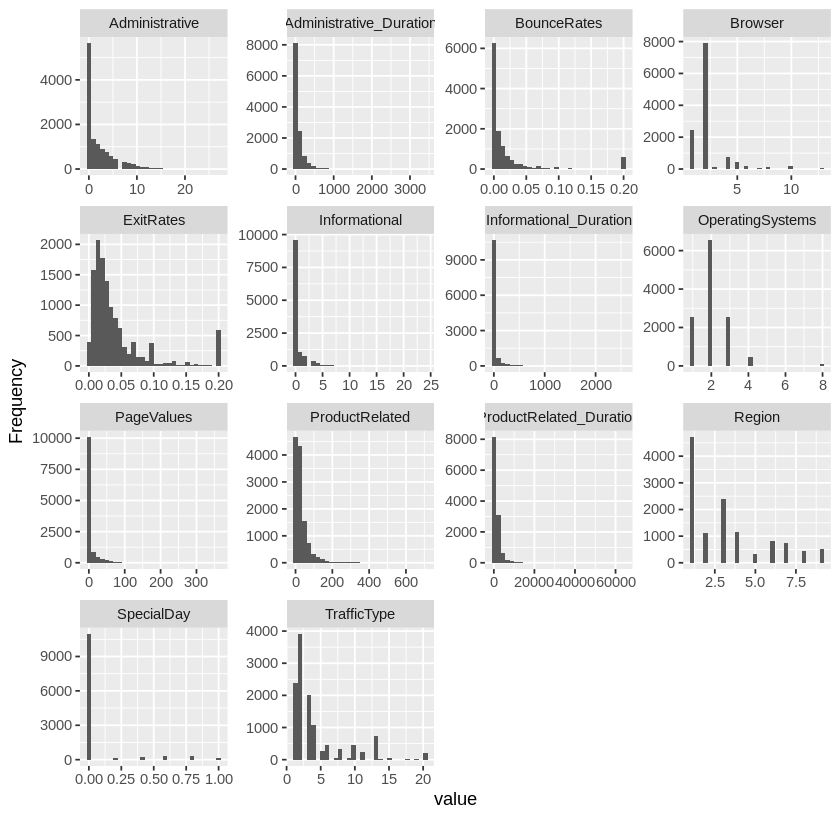

In [ ]:
# Plotting all histograms in the continuous variables in our data 

plot_histogram(df)

* Most variables are skewed to the right with a profusion of outliers.
* Some variables seem to be categorical such as Browser, operating systems, special data, traffic type and region due to the structure of their histograms. 

### Bar Plots

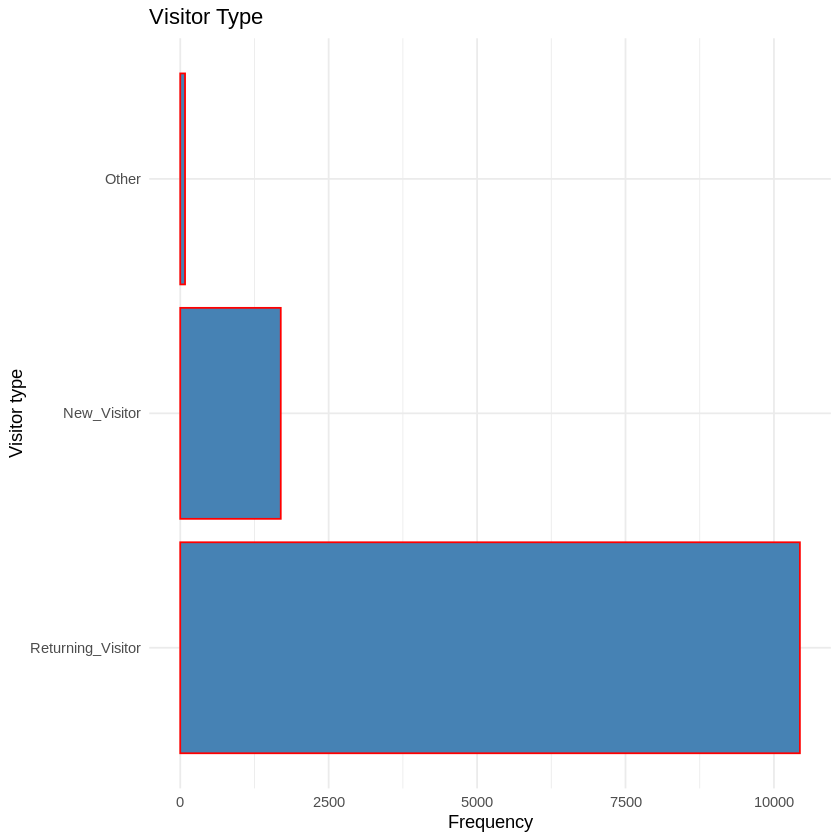

In [ ]:
# Bar plot of the visitor type

df %>%
    ggplot() +
    geom_bar(aes(fct_infreq(VisitorType)), color = "red", fill = "steelblue" ) +
    coord_flip() +
    labs(title = "Visitor Type",
         x = "Visitor type",
         y = "Frequency")+
    theme_minimal()
    

* There 3 categories of the vistors: returning, new and other.

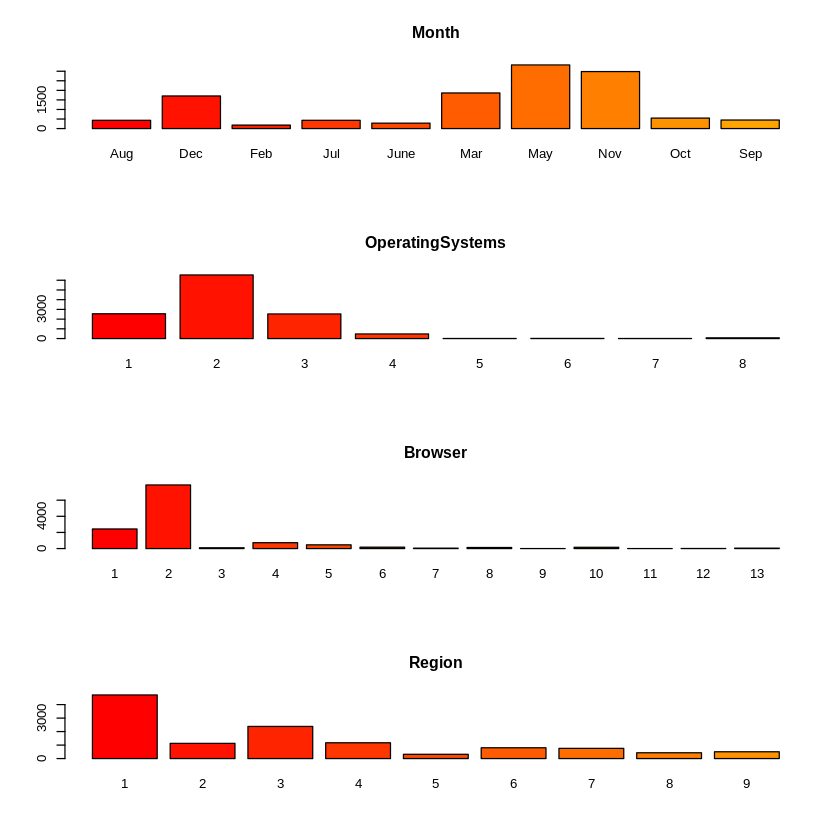

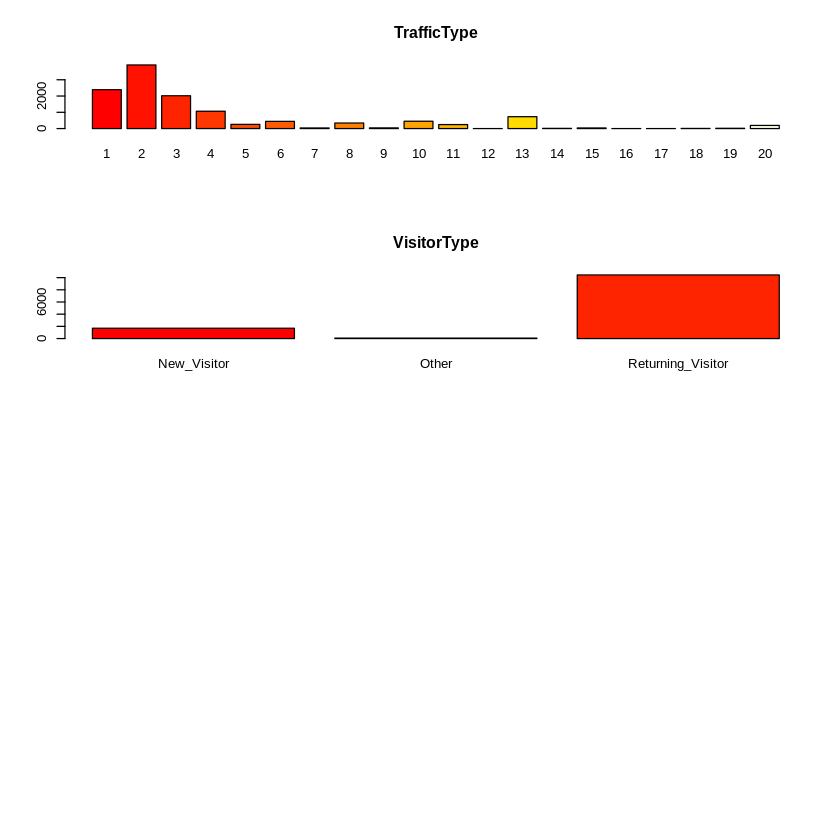

In [ ]:
# Bar plots of the categorical/factor modes variables
par(mfrow=c(4,1))
for(i in 11:16) {
	counts <- table(df[,i])
	name <- names(df)[i]
	barplot(counts, main=name, col = heat.colors(20))}

The bar plots shows the various factors of the categorical variables:
*  May and November were busy months receiving high traffic, Feb received the least traffic of customers.
* Most vistors were returning type.
* Traffic mode number 2, 1 and 3 were heavily used in that order.
* Region number 1 had the most activity, region 5 was less active.
* Browser 2 and 1 were the most commonly used for browsing.
* Operating systems 2, 1 and 3 were mostly used by customers.

### Kernel Density Plots
* 

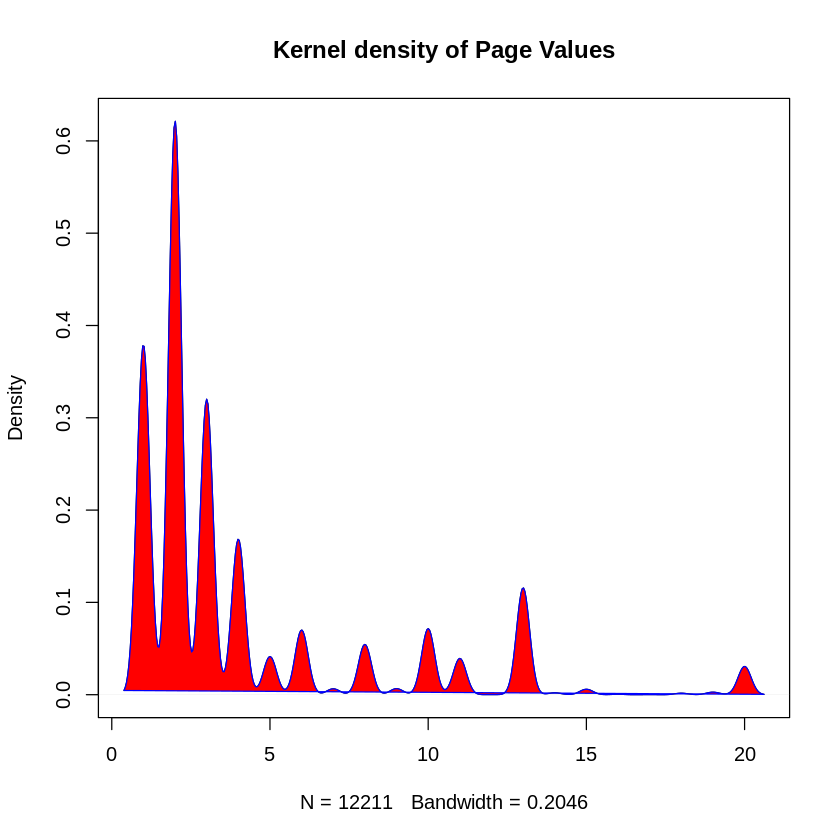

In [ ]:
# kernel density plot
d <- density(df$TrafficType)
plot(d, main = "Kernel density of Page Values")
polygon(d, col = "red", border = "blue")


# 1.7 Bivariate Analysis
* Analysis of two variables to determine their empirical relationship.


### Scatter Plot

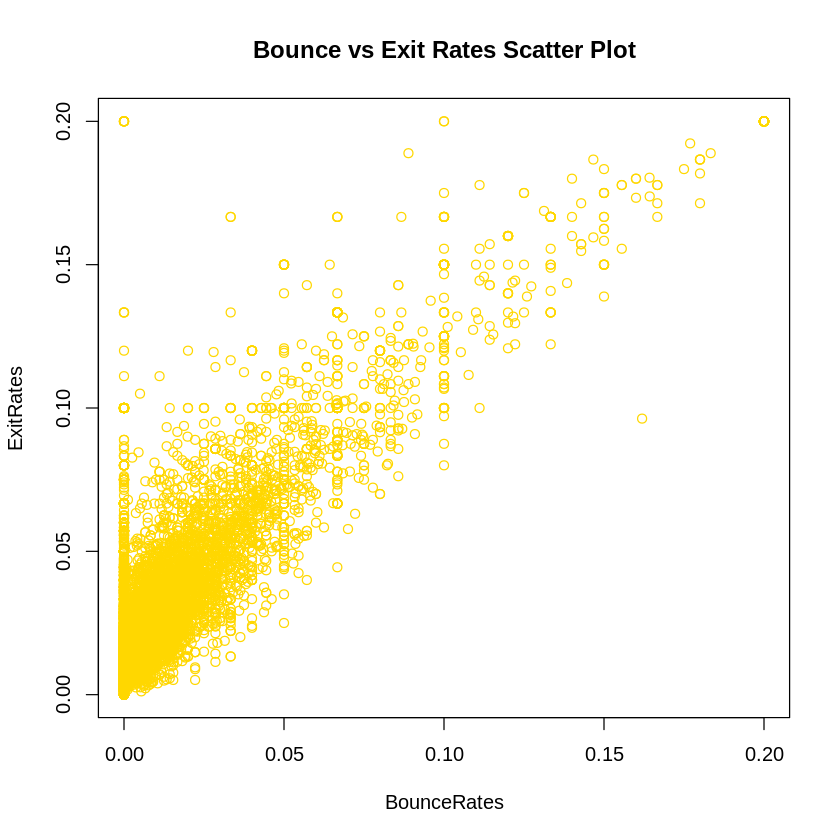

In [ ]:
# Plotting a scatter plot using the plot() method

plot(ExitRates ~ BounceRates, dat = df, 
      col = "gold",
      main = "Bounce vs Exit Rates Scatter Plot")



* From the scatter plot there is a strong positive correlation between Exit rates and Bounce rates.

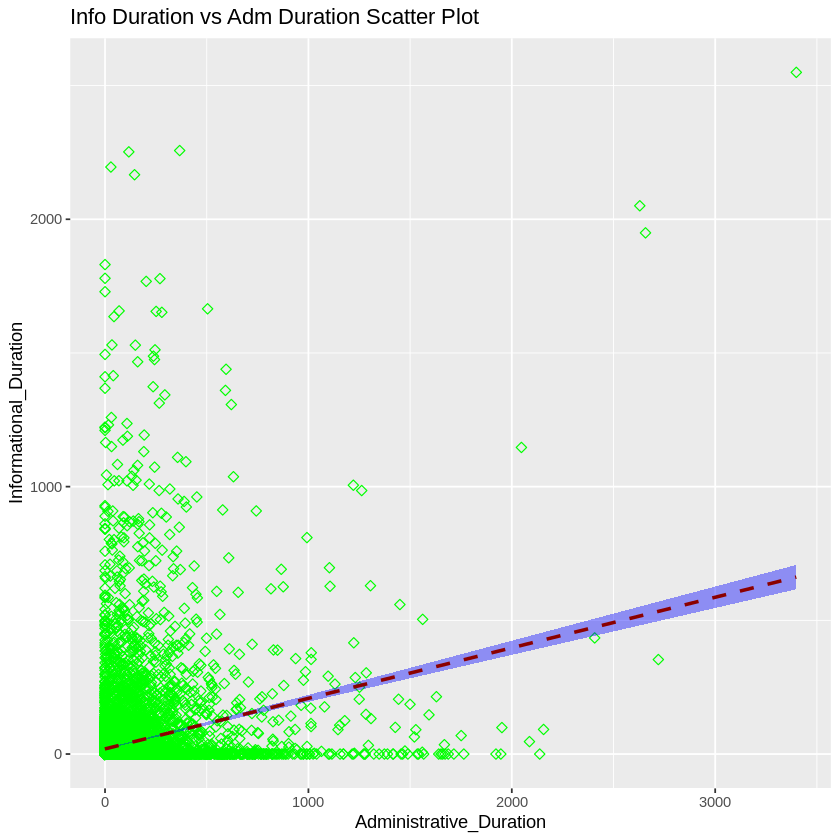

In [ ]:
# Scatter plot using ggplots and fitting a line of best fit

ggplot(df, aes(x = Administrative_Duration, y = Informational_Duration)) + 
        geom_point(size = 2, color= "green", shape = 23)+ 
        geom_smooth(method=lm,  linetype="dashed",color="darkred", fill="blue")+
        labs(title = "Info Duration vs Adm Duration Scatter Plot")
   

* The is a positive correlation between the two variables but not very strong.

Warning message:
“Using size for a discrete variable is not advised.”

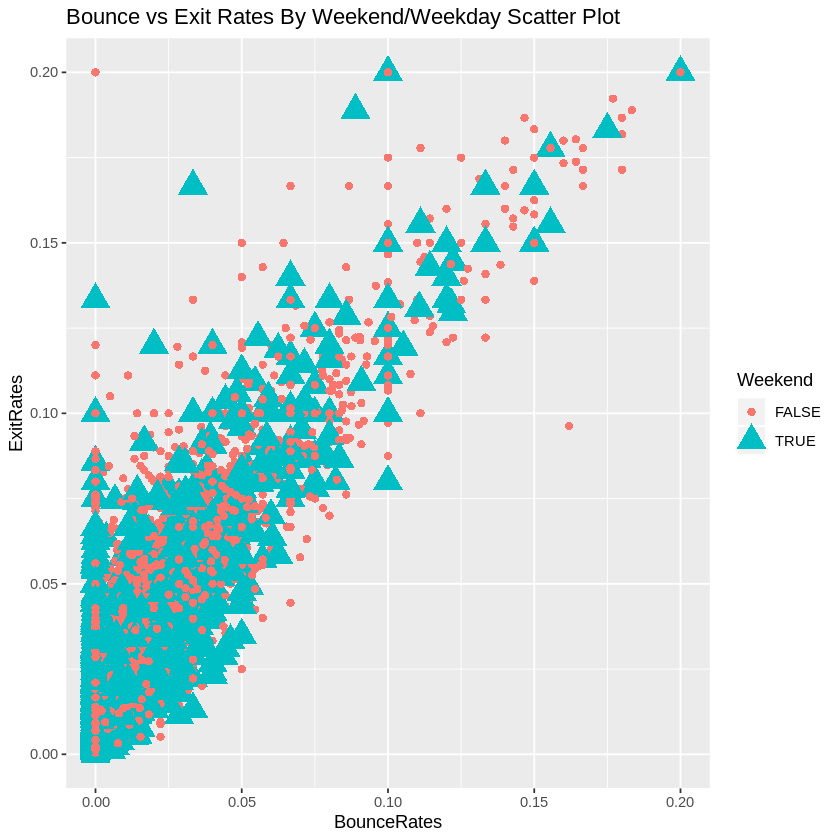

In [ ]:
# Scatter Plot using ggplots to find realtionship between two variables 
# and their association with a categorical variable

ggplot(df, aes(x=BounceRates, y=ExitRates, shape= Weekend, color= Weekend, size= Weekend)) +
  geom_point()+
  labs(title = "Bounce vs Exit Rates By Weekend/Weekday Scatter Plot")

* There is no clear distinction between the bounce and exit rates during the weekdays and weekends

Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 10. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 7309 rows containing missing values (geom_point).”

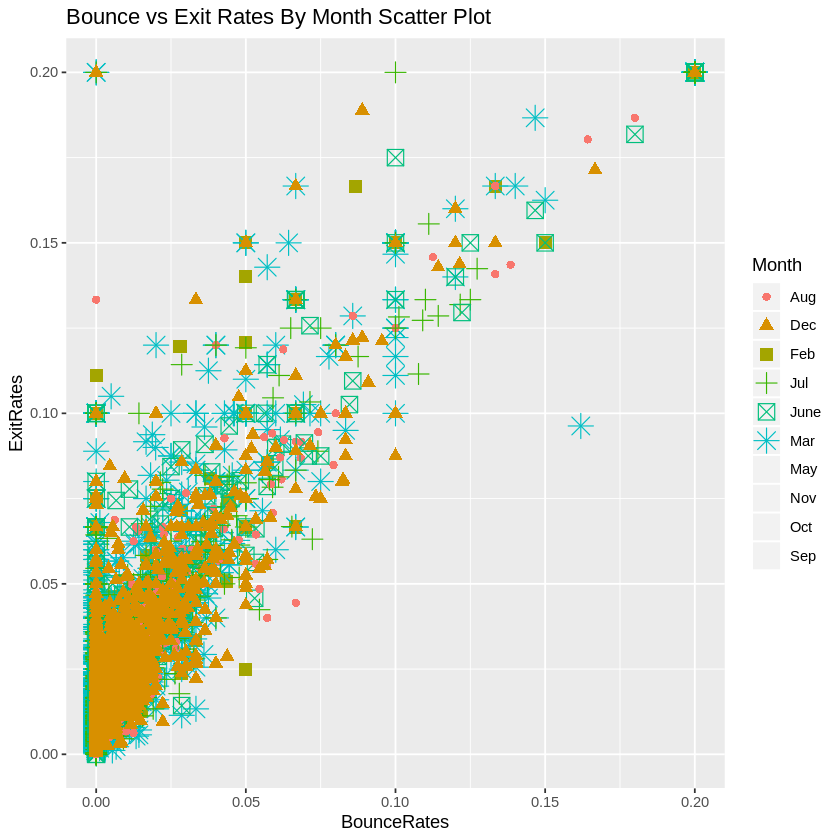

In [ ]:
# Scatter Plot using ggplots to find realtionship between two variables 
# and their association with a categorical variable

ggplot(df, aes(x=BounceRates, y=ExitRates, shape= Month, color= Month, size= Month)) +
  geom_point()+
  labs(title = "Bounce vs Exit Rates By Month Scatter Plot")

* The bounce and exit rates in the month of December is quite high, though the chart shows 6 months only.

### Stacked Bar Chart
* Association between two categorical variables

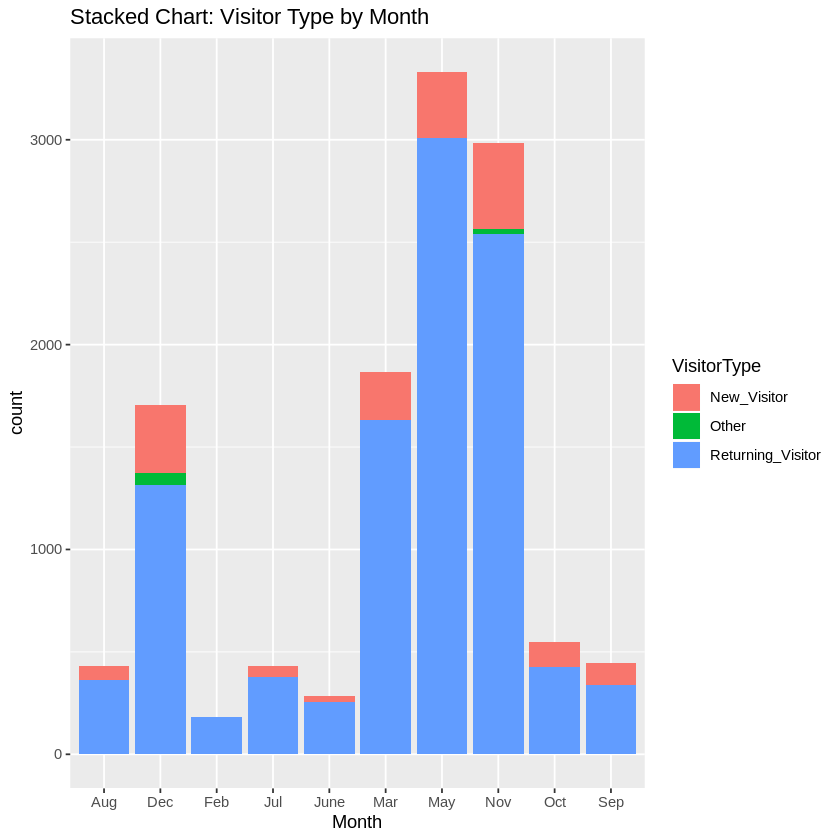

In [ ]:
# Stacked bar chart: Visitor Type vs Month
df %>%
    ggplot(aes(Month)) +
    geom_bar(aes(fill = VisitorType))+
    labs(title = "Stacked Chart: Visitor Type by Month")

* "Other" customer categories came to shop on November and December. It would be prudent to investigate who these other customers are.
* May, Nov, March, and December in that order are the busy months.
* During these months there is a higher number of new visitors which the company can attract using offers tailored for them to retain them.
* Feb and June are the least busy months.
* Feb seems to be ironical as we expect the Valentines day to shoot both traffic and sales for the company which is not the case.


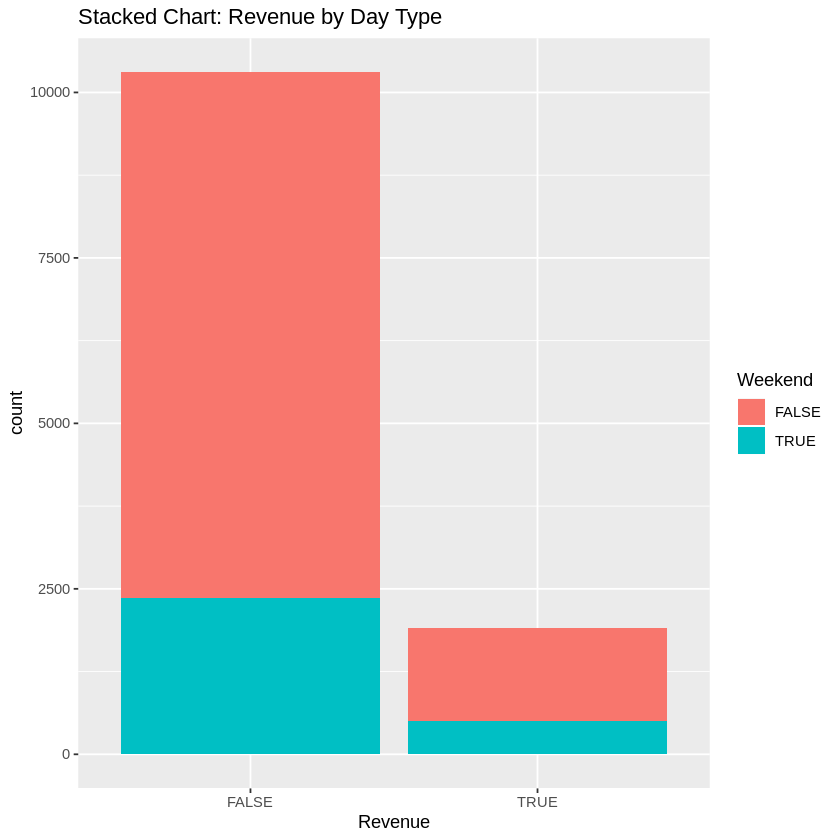

In [ ]:
# Stacked bar chart: Revenue vs Day Type
df %>%
    ggplot(aes(Revenue)) +
    geom_bar(aes(fill = Weekend))+
    labs(title = "Stacked Chart: Revenue by Day Type")

* About three quarters of the data shows that a visit to the page did not result to the company making revenue i.e. the customer did not make a purchase.
* Of the quarter remaining, the company made revenue mostly during the weekdays.

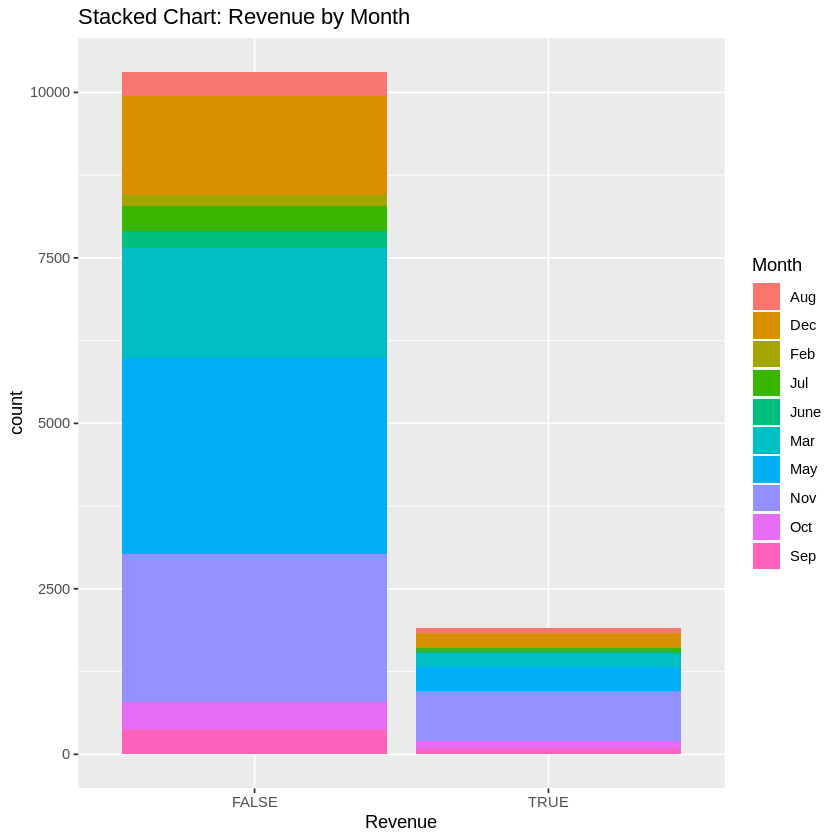

In [ ]:
# Stacked bar chart: Revenue vs Month
df %>%
    ggplot(aes(Revenue)) +
    geom_bar(aes(fill = Month))+
    labs(title = "Stacked Chart: Revenue by Month")

* Though the data has an imbalance class, Nov, May and March are best months when the company makes most revenue.

# 1.8 Multivariate Analysis
* Analysis of three or more variables to draw insights and association between them.

### Correlation Plot

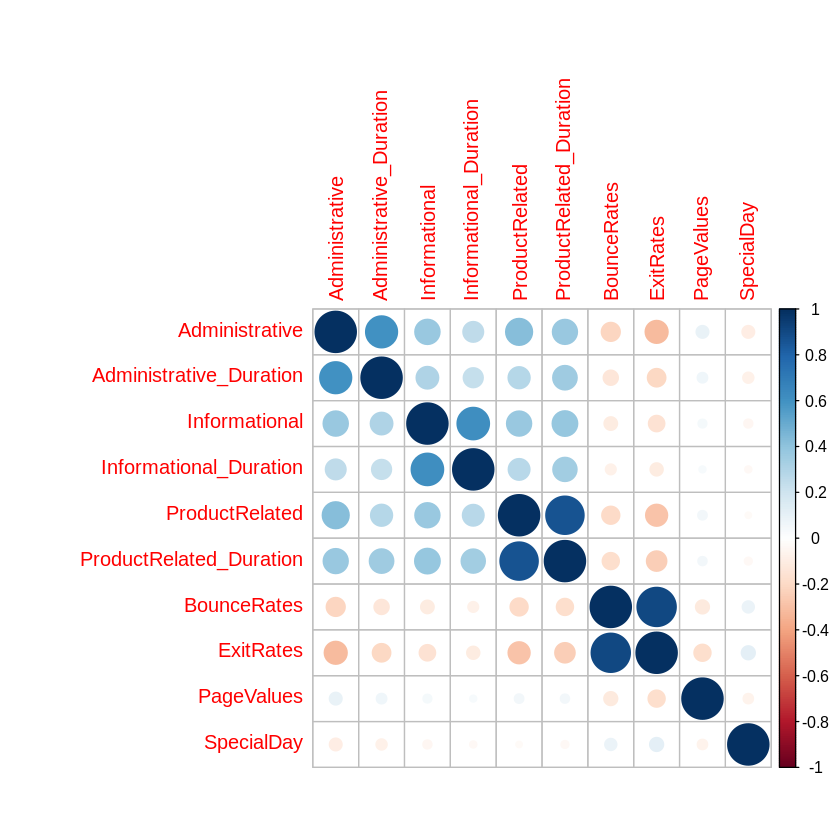

In [ ]:
# calculate correlations
correlations <- cor(df[,1:10])
# create correlation plot
corrplot(correlations, method="circle")


* A dot-representation was used where blue represents positive correlation and red negative.
* The deeper the colors(either blue or red) the strong the relationship between the variables.
* The diagonal are perfectly positively correlated because it shows the correlation of each attribute with itself.
* Checking keenly there is a strong postive relationship between a page and its respective duration for example ProductRelated page and Product Related Duration

### Pair Plot

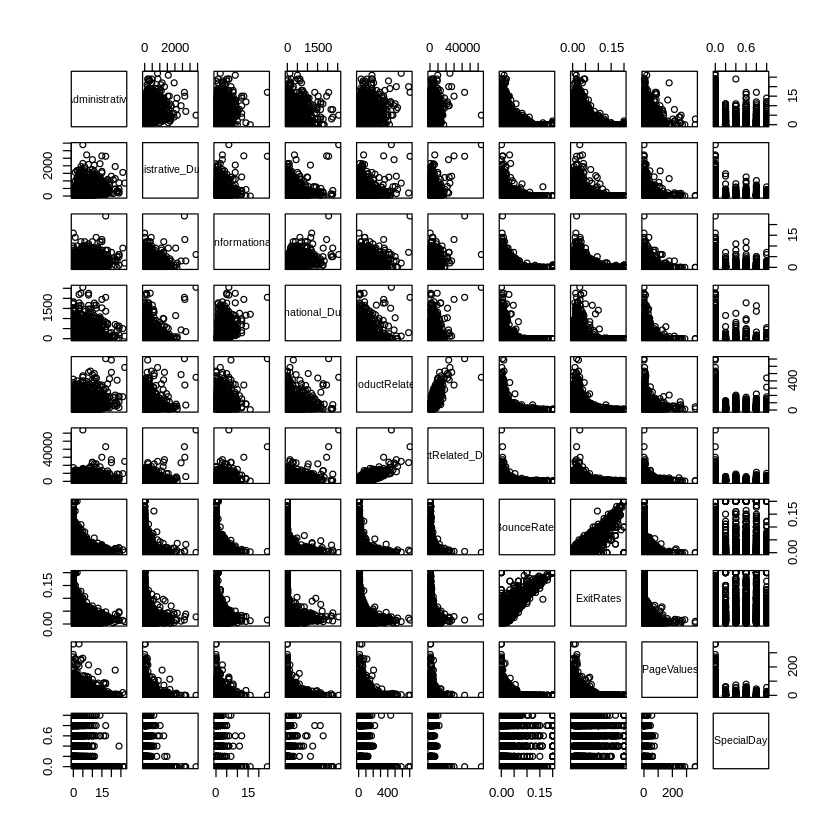

In [ ]:
# Continous variables pair plot

pairs(df[,1:10])

# 1.9 K-Means Clustering
* It is an Unsupervised Machine Learning Technique.

Preprocessing the Data

In [ ]:
# Step 1
# Before implementing the solution,
# we will convert some columns into the right data types.

In [ ]:
# A glimpse of the data
glimpse(df)

Observations: 12,211
Variables: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser        

In [ ]:
# # One hot encoding of the factor variables.

dmy = dummyVars(" ~ .", data = df)

df4 = data.frame(predict(dmy, newdata = df))

In [ ]:
# Checking the data types of each attribute
sapply(df4, class)

Administrative      Administrative_Duration 
                   "numeric"                    "numeric" 
               Informational       Informational_Duration 
                   "numeric"                    "numeric" 
              ProductRelated      ProductRelated_Duration 
                   "numeric"                    "numeric" 
                 BounceRates                    ExitRates 
                   "numeric"                    "numeric" 
                  PageValues                   SpecialDay 
                   "numeric"                    "numeric" 
                    MonthAug                     MonthDec 
                   "numeric"                    "numeric" 
                    MonthFeb                     MonthJul 
                   "numeric"                    "numeric" 
                   MonthJune                     MonthMar 
                   "numeric"                    "numeric" 
                    MonthMay                     MonthNov 
                   "numeric"                    "numeric" 
                    MonthOct                     MonthSep 
                   "numeric"                    "numeric" 
            OperatingSystems                      Browser 
                   "numeric"                    "numeric" 
                      Region                  TrafficType 
                   "numeric"                    "numeric" 
      VisitorTypeNew_Visitor             VisitorTypeOther 
                   "numeric"                    "numeric" 
VisitorTypeReturning_Visitor                 WeekendFALSE 
                   "numeric"                    "numeric" 
                 WeekendTRUE                 RevenueFALSE 
                   "numeric"                    "numeric" 
                 RevenueTRUE 
                   "numeric"

In [ ]:
# Confirming changes
glimpse(df4)

Observations: 12,211
Variables: 31
$ Administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ Administrative_Duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ Informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ ProductRelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7…
$ ProductRelated_Duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667…
$ BounceRates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0…
$ ExitRates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0…
$ PageValues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, …
$ MonthAug                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ MonthDec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ MonthFeb       

In [ ]:
# Step 2
# We are instructed to use Revenue as the class label,
# Hence we will remove it and store it in another variable

df4_copy <- df4[, -c(30:31)]
df.class<- df[, "Revenue"]

df4_copy_copy <- df4[, -c(30,31)]


In [ ]:
# Previewing the class
head(df.class)

Revenue
<lgl>
FALSE
FALSE
FALSE
FALSE
FALSE
FALSE


In [ ]:
# Previewing the copy dataset with dummies
head(df4_copy)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthSep,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendFALSE,WeekendTRUE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,0,1,1,1,1,0,0,1,1,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,0,2,2,1,2,0,0,1,1,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,0,4,1,9,3,0,0,1,1,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,0,3,2,2,4,0,0,1,1,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,0,3,3,1,4,0,0,1,0,1
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,0,2,2,1,3,0,0,1,1,0


In [ ]:
# Step 3: Normalizing OR SCALING the data?? Lets see which gives the best:
# This is important to ensure that no particular attribute,
# Has more impact on clustering algorithm than others

df4_scaled <- scale(df4_copy)

In [ ]:
# After scaling the data lets see what we find in the output
summary(df4_scaled)

 Administrative    Administrative_Duration Informational   
 Min.   :-0.7029   Min.   :-0.4660         Min.   :-0.399  
 1st Qu.:-0.7029   1st Qu.:-0.4603         1st Qu.:-0.399  
 Median :-0.4025   Median :-0.4096         Median :-0.399  
 Mean   : 0.0000   Mean   : 0.0000         Mean   : 0.000  
 3rd Qu.: 0.4986   3rd Qu.: 0.0728         3rd Qu.:-0.399  
 Max.   : 7.4072   Max.   :18.6939         Max.   :18.422  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2535        Min.   :-0.7191   Min.   :-0.6298        
 1st Qu.:-0.2464        1st Qu.:-0.5397   1st Qu.:-0.5281        
 Median :-0.2464        Median :-0.3154   Median :-0.3108        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2464        3rd Qu.: 0.1333   3rd Qu.: 0.1401        
 Max.   :17.7845        Max.   :15.0955   Max.   :32.7079        
  BounceRates         ExitRates         PageValues        SpecialDay     
 Min.   :-0.45060   Min.   :-0.8978   Min.  

* It is evident that there are some attributes still with large values compared to others.
* Scaling makes the data changes the data to have a mean 0.
* We will normalize the data and see if we get different results.

In [ ]:
# Normalizing the a copy of the original data

df_norm <- as.data.frame(apply(df4_copy, 2, function(x) (x - min(x))/(max(x)-min(x))))

In [ ]:
# summary of the normalized data.
summary(df_norm)

 Administrative    Administrative_Duration Informational   
 Min.   :0.00000   Min.   :0.0000000       Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0002941       1st Qu.:0.0000  
 Median :0.03704   Median :0.0029414       Median :0.0000  
 Mean   :0.08667   Mean   :0.0243198       Mean   :0.0212  
 3rd Qu.:0.14815   3rd Qu.:0.0281197       3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.0000000       Max.   :1.0000  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :0.0000000      Min.   :0.00000   Min.   :0.000000       
 1st Qu.:0.0003921      1st Qu.:0.01135   1st Qu.:0.003048       
 Median :0.0003921      Median :0.02553   Median :0.009566       
 Mean   :0.0140517      Mean   :0.04547   Mean   :0.018890       
 3rd Qu.:0.0003921      3rd Qu.:0.05390   3rd Qu.:0.023094       
 Max.   :1.0000000      Max.   :1.00000   Max.   :1.000000       
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :

* Here, we have a maximum value of 1 and minimum value of 0s and mean of close to zero in all attributes.
* We will use the NORMALIZED dataset for clustering.

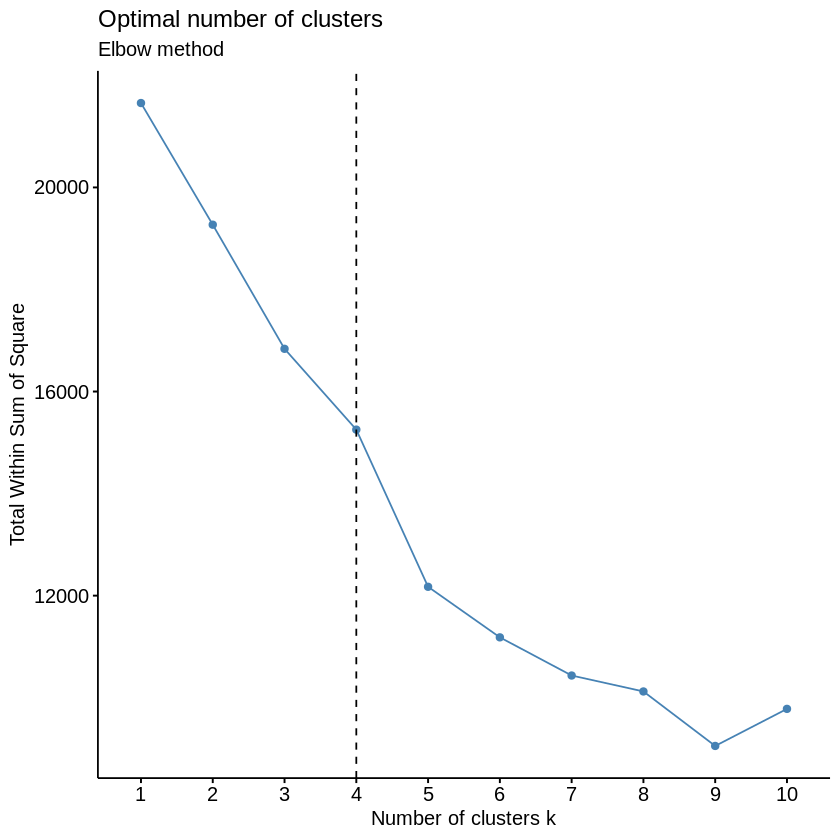

In [ ]:
# Searching for the optimal number of clusters
# # Elbow method
fviz_nbclust(df_norm, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")


In [ ]:
# Applying K-Means  Clustering algorithm 
# Using 3 centroids as K=3

result <- kmeans(df_norm, 10)

In [ ]:
# Previewing the number of records in each cluster

result$size

[1]   54  481 1789 1624  737  505  982 1207 2597 2235

In [ ]:
# Viewing the cluster center datapoints by each attribute

result$centers

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthSep,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendFALSE,WeekendTRUE
0.074759945,0.024230404,0.0092592593,0.0024307730,0.023614395,0.0120198060,0.06186762,0.17056485,0.078699139,0.000000000,⋯,0.00000000,0.9417989,0.9351852,0.9652778,0.9298246,0.01851852,0.962962963,0.01851852,0.9629630,0.03703704
0.094633095,0.027593641,0.0142065142,0.0081087908,0.025396264,0.0098429415,0.02082420,0.09664327,0.025573520,0.016632017,⋯,0.04573805,0.1562222,0.1010049,0.2876819,0.1535179,0.99584200,0.004158004,0.00000000,0.0000000,1.00000000
0.105210856,0.029134970,0.0290898081,0.0183788917,0.073872245,0.0314253499,0.05563131,0.16181372,0.018135040,0.000000000,⋯,0.00000000,0.1572307,0.1031302,0.2418250,0.1704569,0.00000000,0.005589715,0.99441029,1.0000000,0.00000000
0.082770430,0.024069557,0.0205640389,0.0124650204,0.040206096,0.0171197297,0.06025658,0.17893961,0.015348100,0.058620690,⋯,0.00000000,0.1609782,0.1142241,0.2697044,0.1782149,0.00000000,0.000000000,1.00000000,1.0000000,0.00000000
0.047238555,0.011502505,0.0120420624,0.0074381902,0.042834185,0.0157932569,0.14043276,0.27945090,0.005301181,0.744911805,⋯,0.00000000,0.1680558,0.1207598,0.2466079,0.1998143,0.00000000,0.000000000,1.00000000,0.8086839,0.19131615
0.000880088,0.000320175,0.0004125413,0.0003711355,0.002954849,0.0004276352,0.96472994,0.97791556,0.000000000,0.080000000,⋯,0.01386139,0.1657709,0.1128713,0.2849010,0.2100052,0.01188119,0.015841584,0.97227723,1.0000000,0.00000000
0.091347967,0.025825151,0.0274524779,0.0211679057,0.049464835,0.0221004173,0.05143944,0.17148497,0.016507449,0.000000000,⋯,0.00000000,0.1530404,0.1101494,0.2729124,0.1410655,0.00000000,0.006109980,0.99389002,1.0000000,0.00000000
0.095001381,0.027368586,0.0138773819,0.0080014805,0.025815133,0.0100702158,0.02282152,0.10084036,0.031584026,0.021209611,⋯,0.07125104,0.1436856,0.1095692,0.2814830,0.1486068,1.00000000,0.000000000,0.00000000,1.0000000,0.00000000
0.091438018,0.025423400,0.0201680116,0.0140126095,0.044919867,0.0185343361,0.05728616,0.17889725,0.012176258,0.010781671,⋯,0.09973046,0.1542989,0.1142023,0.2712745,0.1255295,0.00000000,0.000000000,1.00000000,1.0000000,0.00000000
0.093511532,0.026004203,0.0272653232,0.0187585929,0.051396571,0.0212155386,0.09853268,0.19838323,0.016529403,0.004384787,⋯,0.03310962,0.1612656,0.1026846,0.2627517,0.1610738,0.00000000,0.001342282,0.99865772,0.0000000,1.00000000


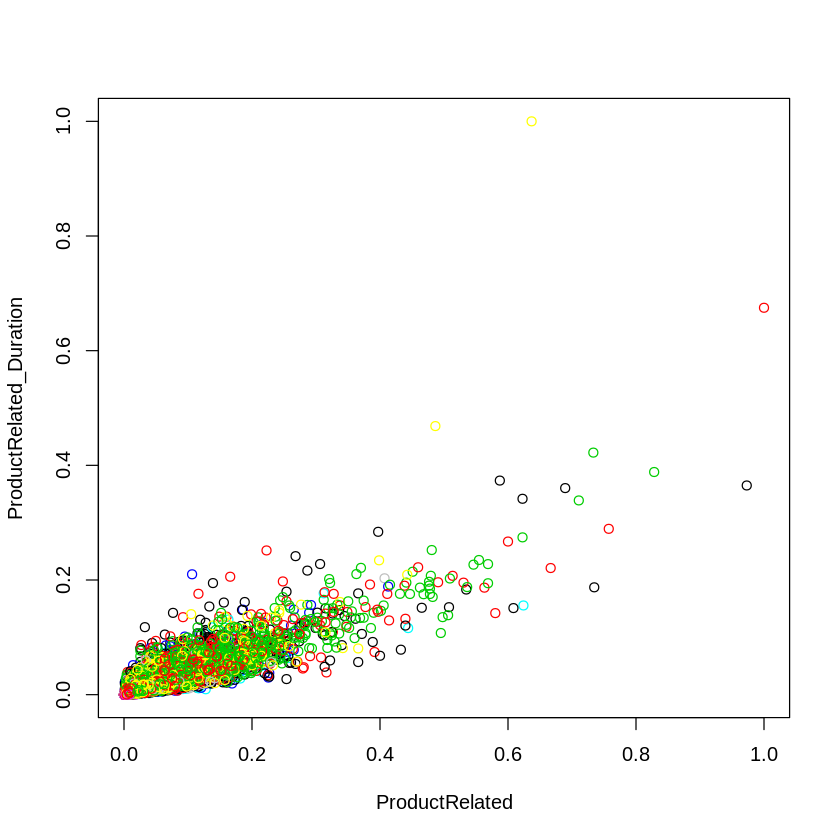

In [ ]:
# Plotting two variables to see how their data points 
# have been distributed in the cluster
# Product Related, vs Product Related Duration

plot(df_norm[, 5:6], col = result$cluster)

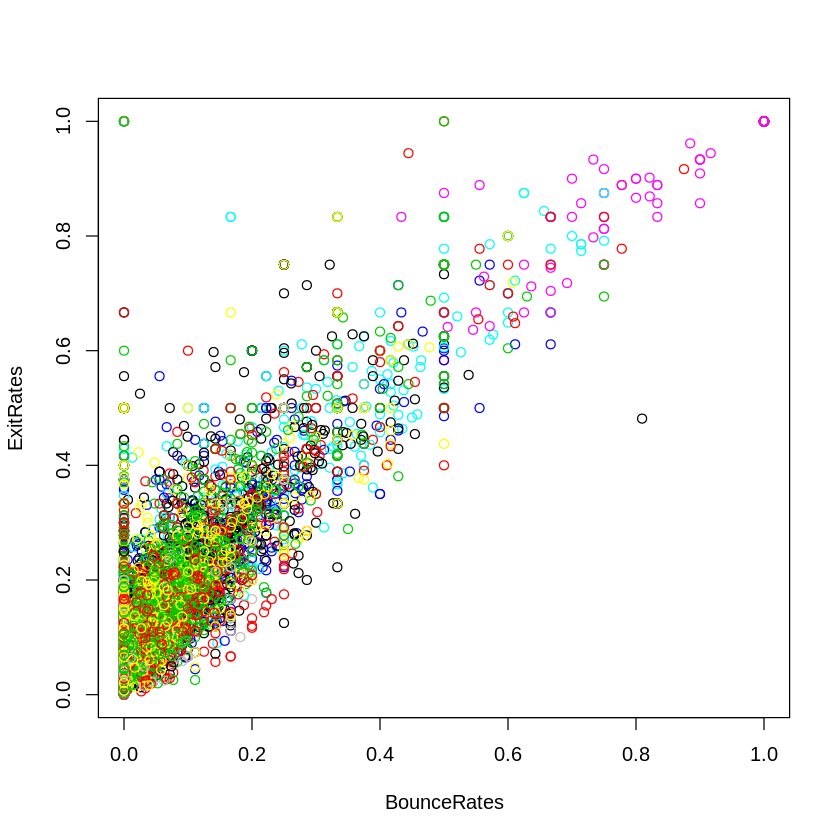

In [ ]:
# Product Related, vs Product Related Duration

plot(df_norm[, 7:8], col = result$cluster)

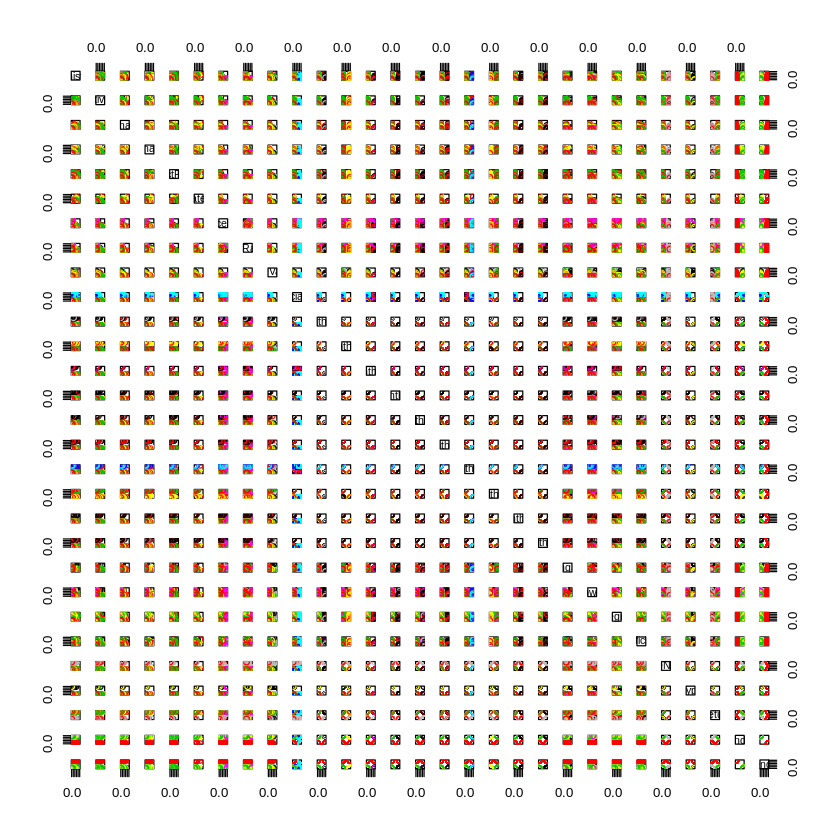

In [ ]:
# Product Related, vs Product Related Duration

plot(df_norm, col = result$cluster)

# 2.0 Hierachical Clustering

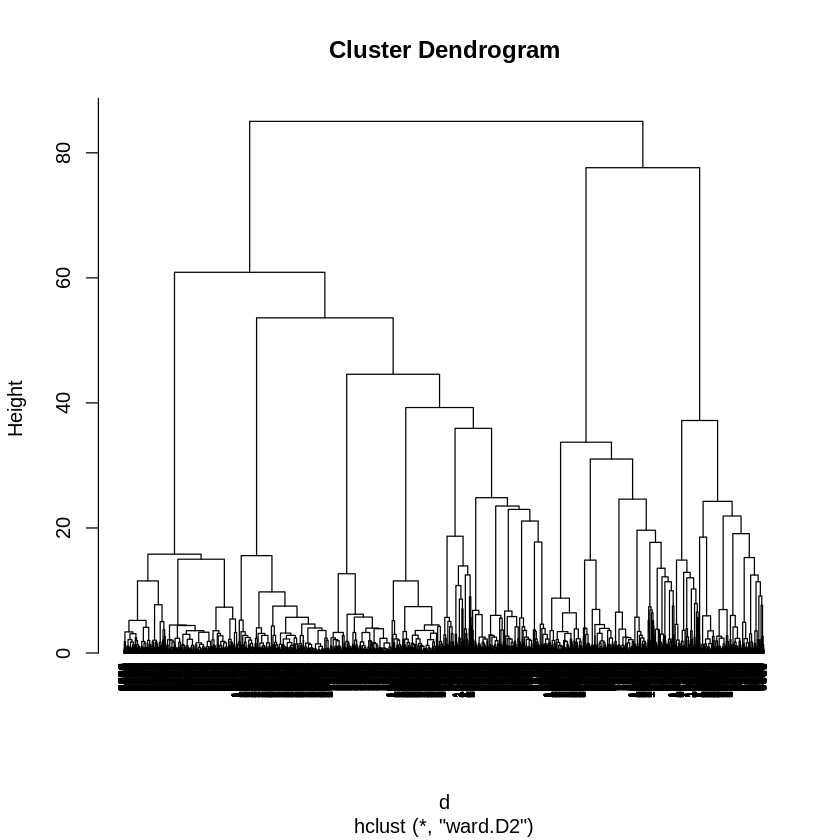

In [ ]:
# We use R function hclust() 
# For hierarchical clustering
# First we use the dist() to compute the Euclidean distance btwn obs
# d will be the first argument in the hclust() dissimilairty matrix
# 

d <- dist(df_norm, method = "euclidean")

# We then apply hierarchical clustering using the Ward's method

res.hc <- hclust(d, method = "ward.D2")

# Lastly we plot the obtained dendrogram
#--

plot(res.hc, cex = 0.6, hang = -1)

# 2.1 Principal Component Analysis (PCA)

In [ ]:
# Applying PCA
# We pass df_norm to the prcomp().
# We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
df_norm_pca <- prcomp(df_norm,
              center = TRUE,
              scale = FALSE) 
summary(df_norm_pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     0.6027 0.5247 0.4888 0.4372 0.37928 0.31326 0.30025
Proportion of Variance 0.2048 0.1552 0.1347 0.1078 0.08111 0.05533 0.05083
Cumulative Proportion  0.2048 0.3600 0.4947 0.6025 0.68359 0.73892 0.78975
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     0.25899 0.21399 0.20275 0.19005 0.18812 0.1736 0.15726
Proportion of Variance 0.03782 0.02582 0.02318 0.02037 0.01995 0.0170 0.01394
Cumulative Proportion  0.82758 0.85340 0.87657 0.89694 0.91689 0.9339 0.94784
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.15023 0.12976 0.12141 0.11861 0.08497 0.06919 0.0652
Proportion of Variance 0.01273 0.00949 0.00831 0.00793 0.00407 0.00270 0.0024
Cumulative Proportion  0.96056 0.97006 0.97837 0.98630 0.99037 0.99307 0.9955
                          PC22    PC23    PC24    

* As a result we obtain 29 principal components, 
* Each which explain a percentate of the total variation of the dataset
* PC1 explains 20.5% of the total variance, which is very low.
* PC2 accounts for 15.5% of the total variance
* We will compare this with the t-SNE results.


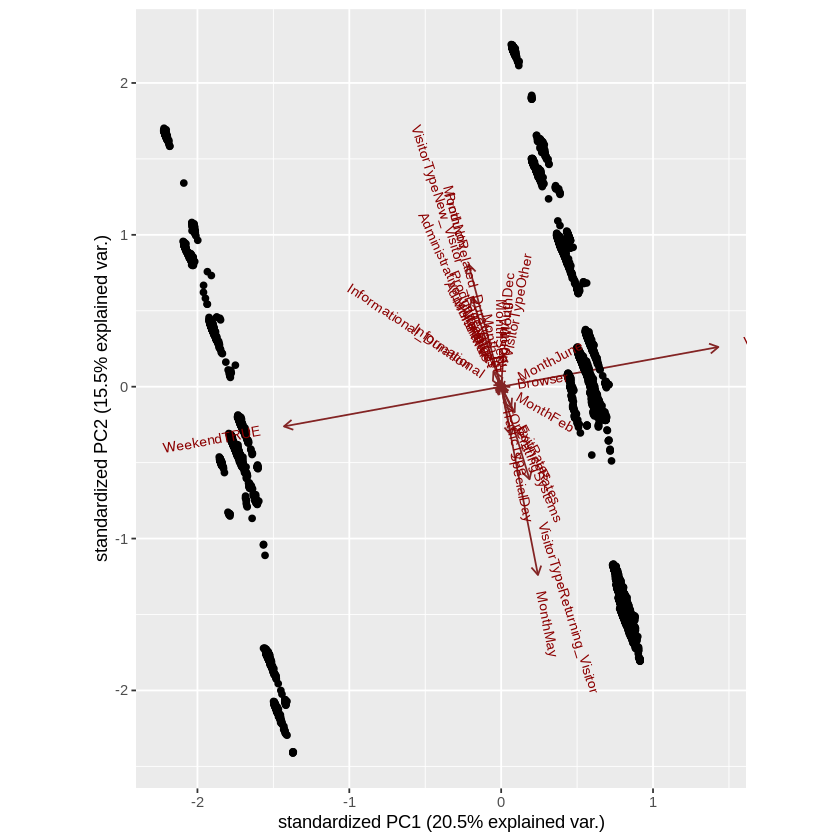

In [ ]:
# Plotting the variable importance
ggbiplot(df_norm_pca)

* From the graph we will see that the variables month of Feb & May, returning visitor, operating systems, exit rate,and Special day contribute to PC1, 


Don't know how to automatically pick scale for object of type tbl_df/tbl/data.frame. Defaulting to continuous.


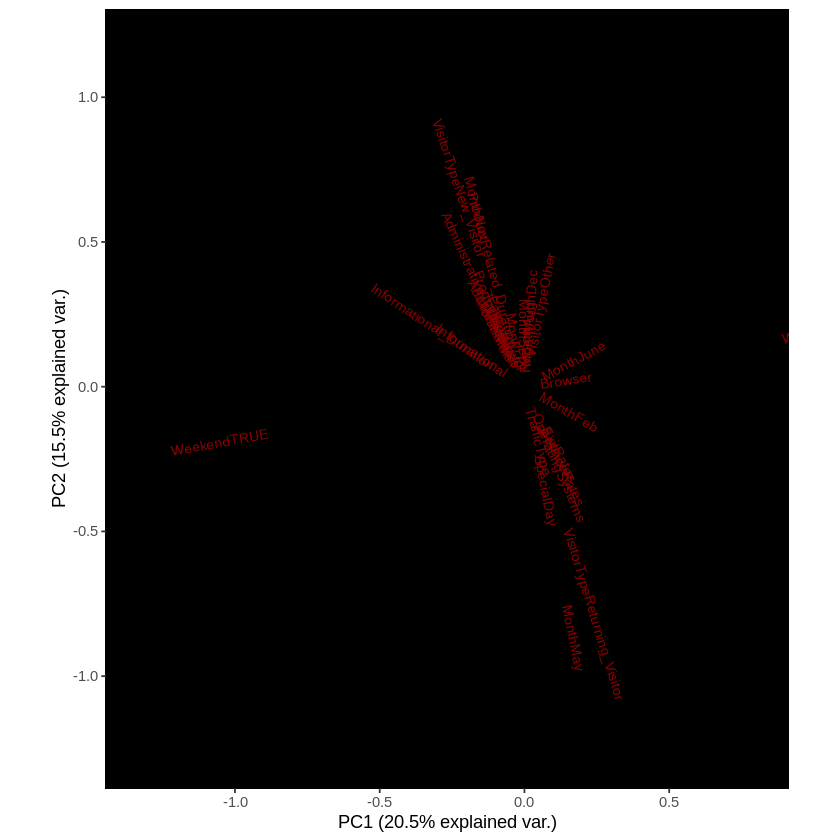

In [ ]:
# # # Adding more detail to the plot,
# # we provide labels as the revenue: True or False.
# 
ggbiplot(df_norm_pca, 
       labels = df.class,
       obs.scale = 1,
       var.scale = 1)

* Weekend were important in determining the second Principal component, (PC2)

# 2.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
# Preparation for plotting

colors <- rainbow(length(unique(df.class)))
names(colors) = unique(df.class)

In [ ]:
# Applying t-SNE

tsne <- Rtsne(df_norm, dims =2, perplexity = 30, verbosity = TRUE,
      max_iter = 500)

# getting the time it takes to execute

exeTimeTsne <- system.time(Rtsne(df_norm, dims = 2, perplexity = 30,
verbose = TRUE, max_iter = 500))
    


Performing PCA
Read the 12211 x 29 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12211
Done in 3.11 seconds (sparsity = 0.010167)!
Learning embedding...
Iteration 50: error is 99.966348 (50 iterations in 3.69 seconds)
Iteration 100: error is 82.495630 (50 iterations in 3.56 seconds)
Iteration 150: error is 73.942423 (50 iterations in 2.41 seconds)
Iteration 200: error is 70.959117 (50 iterations in 2.42 seconds)
Iteration 250: error is 69.279495 (50 iterations in 2.45 seconds)
Iteration 300: error is 2.566862 (50 iterations in 2.39 seconds)
Iteration 350: error is 2.197418 (50 iterations in 2.37 seconds)
Iteration 400: error is 1.930765 (50 iterations in 2.38 seconds)
Iteration 450: error is 1.738969 (50 iterations in 2.40 seconds)
Iteration 500: error is 1.594937 (50 iterations in 2.38 seconds)
Fitting performed in 26.43 seconds.


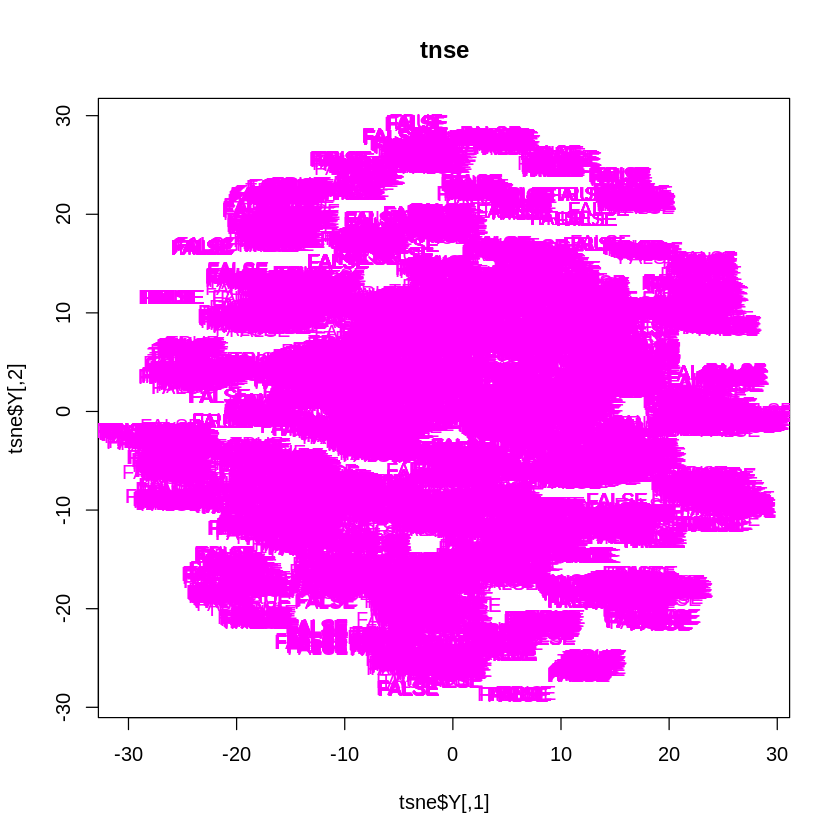

In [ ]:
# Plotting our graph and closely examining the graph

plot(tsne$Y, t = 'n', main = "tnse")
text(tsne$Y, labels =df$Revenue, col = "magenta")